In [1]:
with open('ted_talk_1.txt' , 'r') as file : 
    content = file.read()

In [2]:
print(content[:10])

Malaria is


In [3]:
sentences = content.split(".")
print(sentences[:3])

['Malaria is still one of the biggest killers on the planet', " Despite us making significant progress in the last 20 years, half the world's population is still at risk from this disease", ' In fact, every two minutes a child dies from Malaria']


In [ ]:
import ollama 

from tqdm import tqdm 

embeddings = []
for sentence in tqdm(sentences , desc="embeddings in progress") :
    embeddings.append(ollama.embeddings(model="nomic-embed-text" , prompt = sentence)["embedding"])

print(embeddings)
    

In [11]:
print(embeddings[0])

[1.9488179683685303, -0.029336661100387573, -3.276543617248535, -0.09970240294933319, 1.2271267175674438, 1.735190749168396, -1.4000862836837769, 0.7335561513900757, -0.05242813378572464, 0.13251955807209015, 0.5068729519844055, -0.42432546615600586, 1.6949737071990967, -1.1164641380310059, -0.1137441024184227, -2.25095272064209, -1.5215635299682617, -1.5660613775253296, 0.7068914771080017, 1.1787611246109009, -0.9683820605278015, -0.5930182933807373, 1.7033851146697998, -0.40650516748428345, 1.0796940326690674, 0.7782898545265198, -0.20579315721988678, -0.02811390906572342, 0.9790934324264526, 1.3546496629714966, 1.874692440032959, -0.6339839696884155, -1.4158952236175537, -1.0970314741134644, 0.8301969766616821, 0.3911961615085602, 0.3458111584186554, 1.0953229665756226, 1.6832953691482544, 0.10964400321245193, 1.1817651987075806, -0.5316178202629089, 0.46655380725860596, -1.2616735696792603, -0.10475988686084747, -0.2755281329154968, 0.13903310894966125, 0.3826955556869507, -0.75606

In [12]:

import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

def visualize_embeddings(embeddings, perplexity=5):
    """
    Visualizes high-dimensional embeddings in 2D using t-SNE.

    Parameters:
    - embeddings_dict (dict): Dictionary containing embeddings with keys as identifiers.
    - perplexity (int): The perplexity parameter for t-SNE. Default is 5.

    Returns:
    - None: Displays a scatter plot of the 2D embeddings.
    """
    # Convert embeddings to a numpy array
    embeddings = np.array(list(embeddings))

    # Perform t-SNE to reduce dimensionality to 2D
    tsne = TSNE(n_components=2, random_state=42, perplexity=perplexity, n_iter=500, init="pca")
    embeddings_2d = tsne.fit_transform(embeddings)

    # Create a scatter plot of the 2D embeddings
    plt.figure(figsize=(10, 6))
    plt.scatter(embeddings_2d[:, 0], embeddings_2d[:, 1])


    plt.title('2D representation of embeddings using t-SNE')
    plt.xlabel('t-SNE Dimension 1')
    plt.ylabel('t-SNE Dimension 2')
    plt.tight_layout()
    plt.show()


c:\Users\Achref\Documents\Machine Learning & Data Science\Summarizer\LargeDocSum\venv\Lib\site-packages\sklearn\manifold\_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


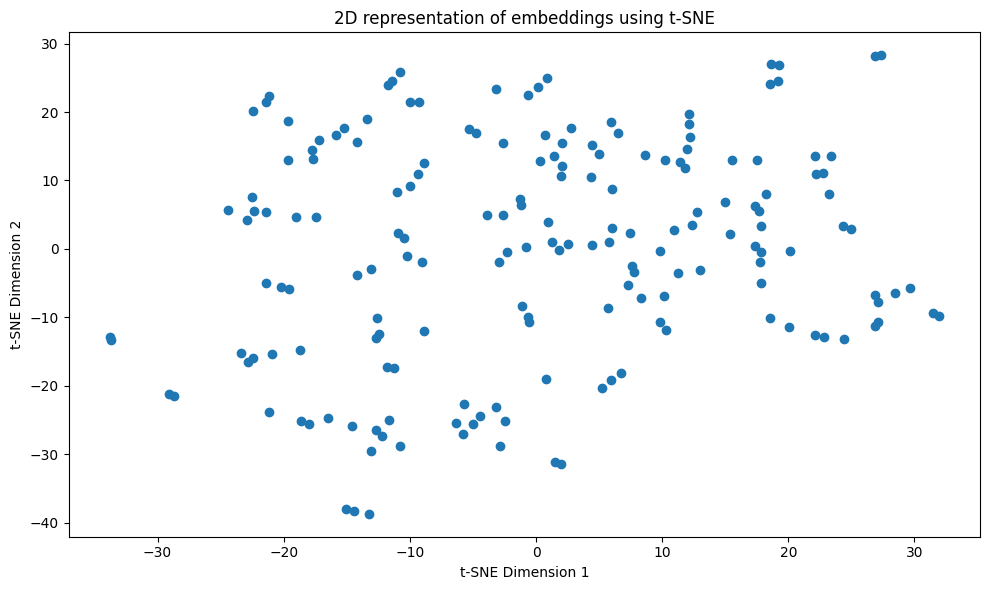

In [13]:
visualize_embeddings(embeddings=np.array(embeddings) , perplexity=5)

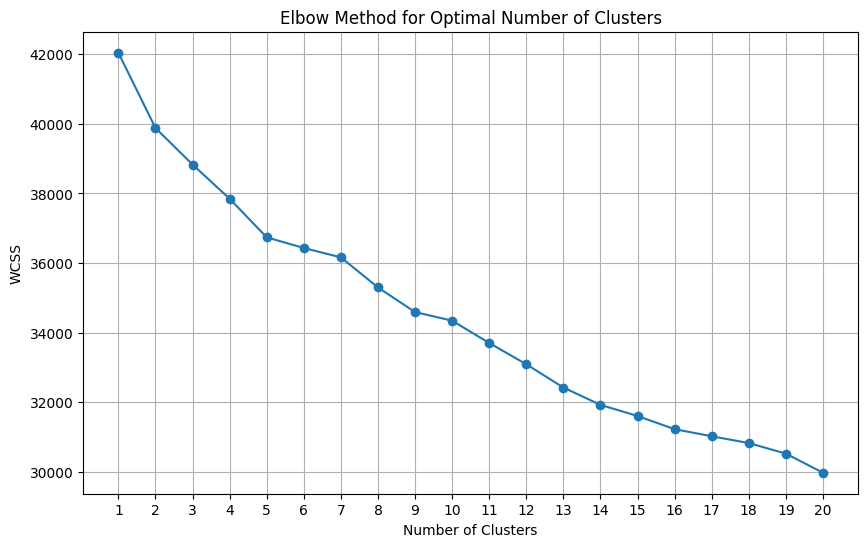

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

def plot_wcss(embeddings, max_clusters=10):
    """
    Plots the Within-Cluster Sum of Square (WCSS) for different numbers of clusters to determine the optimal number of clusters using the elbow method.

    Parameters:
    - embeddings_dict (dict): Dictionary containing embeddings with keys as identifiers.
    - max_clusters (int): The maximum number of clusters to test. Default is 10.

    Returns:
    - None: Displays a plot of WCSS vs. number of clusters.
    """
    # Convert embeddings to a numpy array
    embeddings = np.array(list(embeddings))

    wcss = []

    for n_clusters in range(1, max_clusters + 1):
        kmeans = KMeans(n_clusters=n_clusters, init='k-means++', random_state=42)
        kmeans.fit(embeddings)
        wcss.append(kmeans.inertia_)

    # Plot the WCSS
    plt.figure(figsize=(10, 6))
    plt.plot(range(1, max_clusters + 1), wcss, marker='o', linestyle='-')
    plt.title('Elbow Method for Optimal Number of Clusters')
    plt.xlabel('Number of Clusters')
    plt.ylabel('WCSS')
    plt.xticks(range(1, max_clusters + 1))
    plt.grid(True)
    plt.show()


plot_wcss(embeddings, max_clusters=20)


In [15]:
import numpy as np
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import ListedColormap

# Define a list of distinct colors
colors = ['red', 'blue', 'green', 'orange', 'purple', 'yellow', 'cyan', 'magenta', 'brown', 'pink']

# Create the ListedColormap
cmap = ListedColormap(colors)


def cluster_embeddings_kmeans(embeddings_dict, num_clusters):
    """
    Clusters the embeddings using k-means++.

    Parameters:
    - embeddings_dict (dict): Dictionary containing embeddings with keys as identifiers.
    - num_clusters (int): Number of clusters.

    Returns:
    - dict: A dictionary with the same keys but with cluster labels as values.
    """
    # Convert embeddings to a numpy array
    
    embeddings = np.array(list(embeddings_dict))

    # Perform k-means++ clustering
    kmeans = KMeans(n_clusters=num_clusters, init='k-means++', random_state=42)
    kmeans.fit(embeddings)
    cluster_labels = kmeans.labels_
    cluster_centroids = kmeans.cluster_centers_
    # Create a dictionary with conversation IDs and their corresponding cluster labels
    clustered_sentences_dict = { i :{ 'cluster' : cluster_labels[i] , 'sentence' : sentences[i] , 'emb' : embeddings[i]} for i in range(len(embeddings))}

    return clustered_sentences_dict , cluster_centroids 



def visualize_clusters_tsne(clustered_sentences_dict):
    """
    Visualizes the clusters in 2D using t-SNE.

    Parameters:
    - embeddings_dict (dict): Dictionary containing embeddings with keys as identifiers.
    - clustered_embeddings (dict): Dictionary containing cluster labels for each identifier.

    Returns:
    - None: Displays a scatter plot of the clusters in 2D.
    """
    # Convert embeddings to a numpy array
    embeddings = np.array(list([clustered_sentences_dict[key]["emb"] for key in clustered_sentences_dict.keys()]))

    # Perform t-SNE to reduce dimensionality to 2D
    tsne = TSNE(n_components=2, random_state=42)
    embeddings_2d = tsne.fit_transform(embeddings)

    # Get cluster labels
    cluster_labels = [clustered_sentences_dict[key]["cluster"] for key in clustered_sentences_dict.keys()]

    # Create a scatter plot of the 2D embeddings
    plt.figure(figsize=(10, 6))
    scatter = plt.scatter(embeddings_2d[:, 0], embeddings_2d[:, 1], c=cluster_labels, cmap=cmap, marker='o')
    plt.title('2D representation of clusters using t-SNE')
    plt.xlabel('t-SNE Dimension 1')
    plt.ylabel('t-SNE Dimension 2')
    plt.colorbar(scatter, label='Cluster Label')
    plt.tight_layout()
    plt.show()


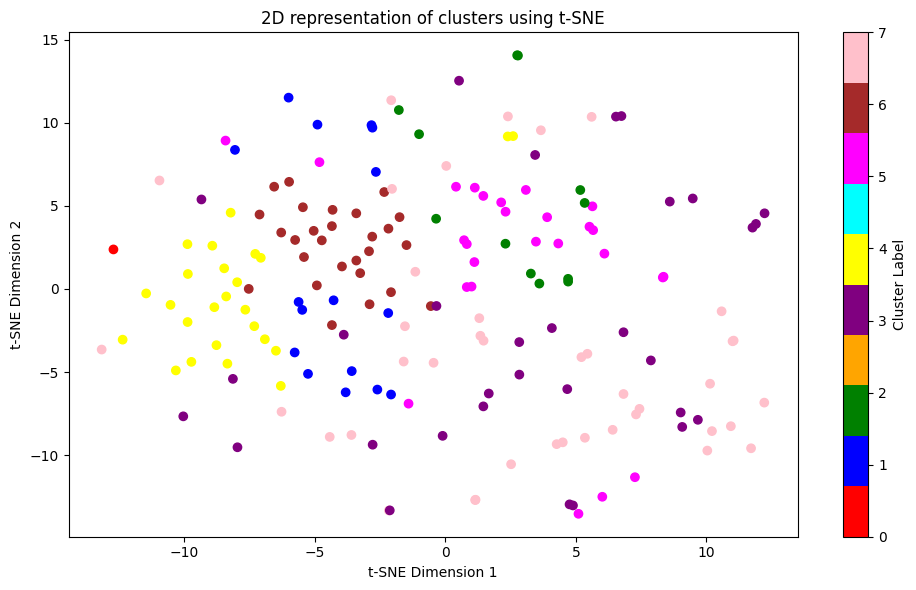

In [16]:
clustered_sentences_dict , cluster_centroids  = cluster_embeddings_kmeans(embeddings, num_clusters = 8)
visualize_clusters_tsne(clustered_sentences_dict)


In [17]:
print(clustered_sentences_dict)

{0: {'cluster': 4, 'sentence': 'Malaria is still one of the biggest killers on the planet', 'emb': array([ 1.94881797, -0.02933666, -3.27654362, -0.0997024 ,  1.22712672,
        1.73519075, -1.40008628,  0.73355615, -0.05242813,  0.13251956,
        0.50687295, -0.42432547,  1.69497371, -1.11646414, -0.1137441 ,
       -2.25095272, -1.52156353, -1.56606138,  0.70689148,  1.17876112,
       -0.96838206, -0.59301829,  1.70338511, -0.40650517,  1.07969403,
        0.77828985, -0.20579316, -0.02811391,  0.97909343,  1.35464966,
        1.87469244, -0.63398397, -1.41589522, -1.09703147,  0.83019698,
        0.39119616,  0.34581116,  1.09532297,  1.68329537,  0.109644  ,
        1.1817652 , -0.53161782,  0.46655381, -1.26167357, -0.10475989,
       -0.27552813,  0.13903311,  0.38269556, -0.75606912, -0.99093139,
        0.0338193 , -0.60499233, -0.00733064, -1.34282112,  1.03111088,
        0.15656857, -0.58485097, -0.23312554, -0.57736188,  0.1199846 ,
        2.09098577,  0.09799002,  0.0

In [18]:
import numpy as np 
def find_closest_data_points_to_centroid(clustered_sentences_dict , cluster_centroids , top_k  ) : 
    closest_sentences = {}
    for cluster_index , cluster_centroid in enumerate( cluster_centroids) :
        distances = []
        for data in clustered_sentences_dict.values() : 
            if data["cluster"] == cluster_index : 
                distances.append({
                    "d" :np.linalg.norm(cluster_centroid - data["emb"]) , 
                    "sentence" : data["sentence"]
                })
        
        distances = sorted(distances , key=lambda  x : x["d"])
        closest_sentences[cluster_index] =[ e["sentence"] for e in distances[ : top_k]]
        
    
    return closest_sentences


closest_sentences = find_closest_data_points_to_centroid(clustered_sentences_dict , cluster_centroids , top_k = 4 )
print(closest_sentences)
                   

{0: [' But importantly, none of the children had any symptoms whatsoever'], 1: [' This could completely revolutionise the way that we track the spread of diseases, the way that we target our control efforts and respond to disease outbreaks, ultimately helping to lead to the eradication of malaria, and even beyond malaria for other diseases that we already know have a smell', " Or something a little bit more technical perhaps, a smartwatch that would alert you when you're infected with malaria", " So what we're also looking to do and working on at the moment is the development of technology, wearable tech that would empower the individual to allow them to self-diagnose", ' They have to detect a number of chemicals in the right concentration, the right ratios, the right combinations of chemicals'], 2: [' So for example, typhoid apparently smells like baked brown bread', " So it's no surprise then, that smell and body odour gets a bit of a bad reputation", " Well, smell is the same, it's 

In [19]:
from openai import OpenAI
import time 
import json 
client = OpenAI(base_url='http://localhost:11434/v1' , api_key="ollama" )
model = "gemma2"
def get_completion_response (prompt : str  , sys_prompt_content :str  , json_r = True , **kwargs) : 
    response = client.chat.completions.create(
        messages = [
            {"role" : "system" , "content" : sys_prompt_content} , 
            {"role" : "user" , "content" : prompt.format(**kwargs)}
        ] , 
        model = model , 
        temperature=  0 ,
        response_format={ "type": "json_object" } if json_r else None ,    
    )
    return json.loads(response.choices[0].message.content)


#test 
response_content =  get_completion_response("test test " , "zoeidizopef" , stream = False ) 
print(response_content)

{'text': "I'm sorry, I don't understand. Can you please rephrase your request?"}


In [20]:
#get the common general abstract idea 

sys_prompt = "you are an AI assistant designed to summarize text"
prompt = "summarize these phrases extarcted from a very large document , yo will be given multiple sentences in chronological order , summarize them into a single phrase your output should look like this {format} , these are the chunks extracted from the large document : {chunks}"
format = """{"s"  : "here you put the summary of the document"}"""
cluster_summaries = {}
for cluster_index , sentences in closest_sentences.items() : 
    chunks = "the extracted chunks from the large document are : " + " \n -".join(sentences)
    summary = get_completion_response(prompt , sys_prompt , json=True , format = format  , chunks = chunks )
    cluster_summaries[cluster_index] = summary["s"]
    
print(cluster_summaries)

{0: 'None of the children exhibited any symptoms.', 1: 'Researchers are developing wearable technology, like smartwatches, that can detect disease through chemical analysis, enabling self-diagnosis and revolutionizing disease tracking and control.', 2: 'Certain diseases have distinct odors, such as typhoid smelling like baked brown bread, TB like stale beer, and yellow fever like a butcher shop.', 3: "A dog is being tested in a strange environment, sniffing out signals from people represented as 'socks'", 4: "A study found that malaria parasites manipulate their hosts to become more attractive to mosquitoes, aiding in the parasite's life cycle. The parasite infects humans through mosquito bites, replicates within the mosquito's gut and salivary glands, and is then transmitted back to humans during subsequent bites.", 5: 'Researchers explored using foot odor collected through bags to detect illness-related chemicals, aiming to harness the power of smell for medical diagnosis.', 6: 'Rese

In [21]:
processed_data = []
for i , data in enumerate(clustered_sentences_dict.values() )  : 
    d = {
        "sentence" : data["sentence"],
        "cluster" : data["cluster"] , 
        "cluster_sum" : cluster_summaries[data['cluster']]
    }
    processed_data.append(d)
    
print(processed_data[0])


{'sentence': 'Malaria is still one of the biggest killers on the planet', 'cluster': 4, 'cluster_sum': "A study found that malaria parasites manipulate their hosts to become more attractive to mosquitoes, aiding in the parasite's life cycle. The parasite infects humans through mosquito bites, replicates within the mosquito's gut and salivary glands, and is then transmitted back to humans during subsequent bites."}


In [22]:

def create_transition_matrix(processed_data , n_clusters) : 
    transition_matrix = np.zeros(shape = (n_clusters ,n_clusters))
    for i in tqdm(range(len(processed_data)-1)) : 
        from_cluster = processed_data[i]["cluster"]
        to_cluster = processed_data[i+1]["cluster"]
        transition_matrix[from_cluster][to_cluster] +=1 

    sum = np.sum(transition_matrix , axis = 1 , keepdims=True)

    return transition_matrix/sum

In [23]:
transition_matrix = create_transition_matrix(processed_data  , len(cluster_centroids))
print(transition_matrix)

100%|██████████| 177/177 [00:00<?, ?it/s]

[[0.         0.         0.         0.         0.         0.
  0.         1.        ]
 [0.         0.4375     0.         0.1875     0.         0.0625
  0.0625     0.25      ]
 [0.         0.08333333 0.58333333 0.         0.         0.25
  0.08333333 0.        ]
 [0.         0.         0.1        0.26666667 0.06666667 0.13333333
  0.06666667 0.36666667]
 [0.04       0.04       0.         0.16       0.52       0.
  0.16       0.08      ]
 [0.         0.15384615 0.03846154 0.07692308 0.         0.30769231
  0.11538462 0.30769231]
 [0.         0.07407407 0.         0.14814815 0.14814815 0.14814815
  0.37037037 0.11111111]
 [0.         0.025      0.025      0.25       0.125      0.15
  0.15       0.275     ]]


In [24]:
import numpy as np
import networkx as nx
from typing import Dict
import os 
from pyvis.network import Network
import networkx as nx
from pyvis.network import Network
import networkx as nx


def create_directed_graph(transition_matrix, summary_by_cluster):
    G = nx.DiGraph()
    cluster_by_intent = {intent : int(cluster) for cluster , intent in summary_by_cluster.items()}
    # Add edges with weights greater than the specified minimum weight
    for i , from_intent in summary_by_cluster.items():
        for j, to_intent in summary_by_cluster.items():
            #if i != j :
            G.add_edge(from_intent, to_intent, weight=transition_matrix[int(i), int(j)])
    return G 

graph = create_directed_graph(transition_matrix , cluster_summaries)

In [25]:
def plot_graph(G, summary_by_cluster):
    # Define the layout for the graph
    pos = nx.spring_layout(G , iterations=5 , seed=3)
    for k, v in pos.items():
        pos[k] = (-v[0], v[1])  # Flip the x-coordinates to make the graph right to left

    # Draw the nodes with labels
    plt.figure(figsize=(40, 20))
    nx.draw_networkx_nodes(G, pos, node_size=3000, node_color='skyblue')
    nx.draw_networkx_labels(G, pos, font_size=12, font_color='black')

    # Draw the edges with customized appearance
    edges = G.edges(data=True)
    nx.draw_networkx_edges(G, pos, edgelist=edges, arrowstyle='->', arrowsize=50, edge_color='gray', width=4 , arrows=True)
    
    # Draw the edge labels with weights
    edge_labels = {(u, v): f'{d["weight"]:.2f}' for u, v, d in edges}
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='blue', font_size=10 , )

    plt.title('Intent Transition Graph')
    plt.axis('off')
    plt.show()
    return G 


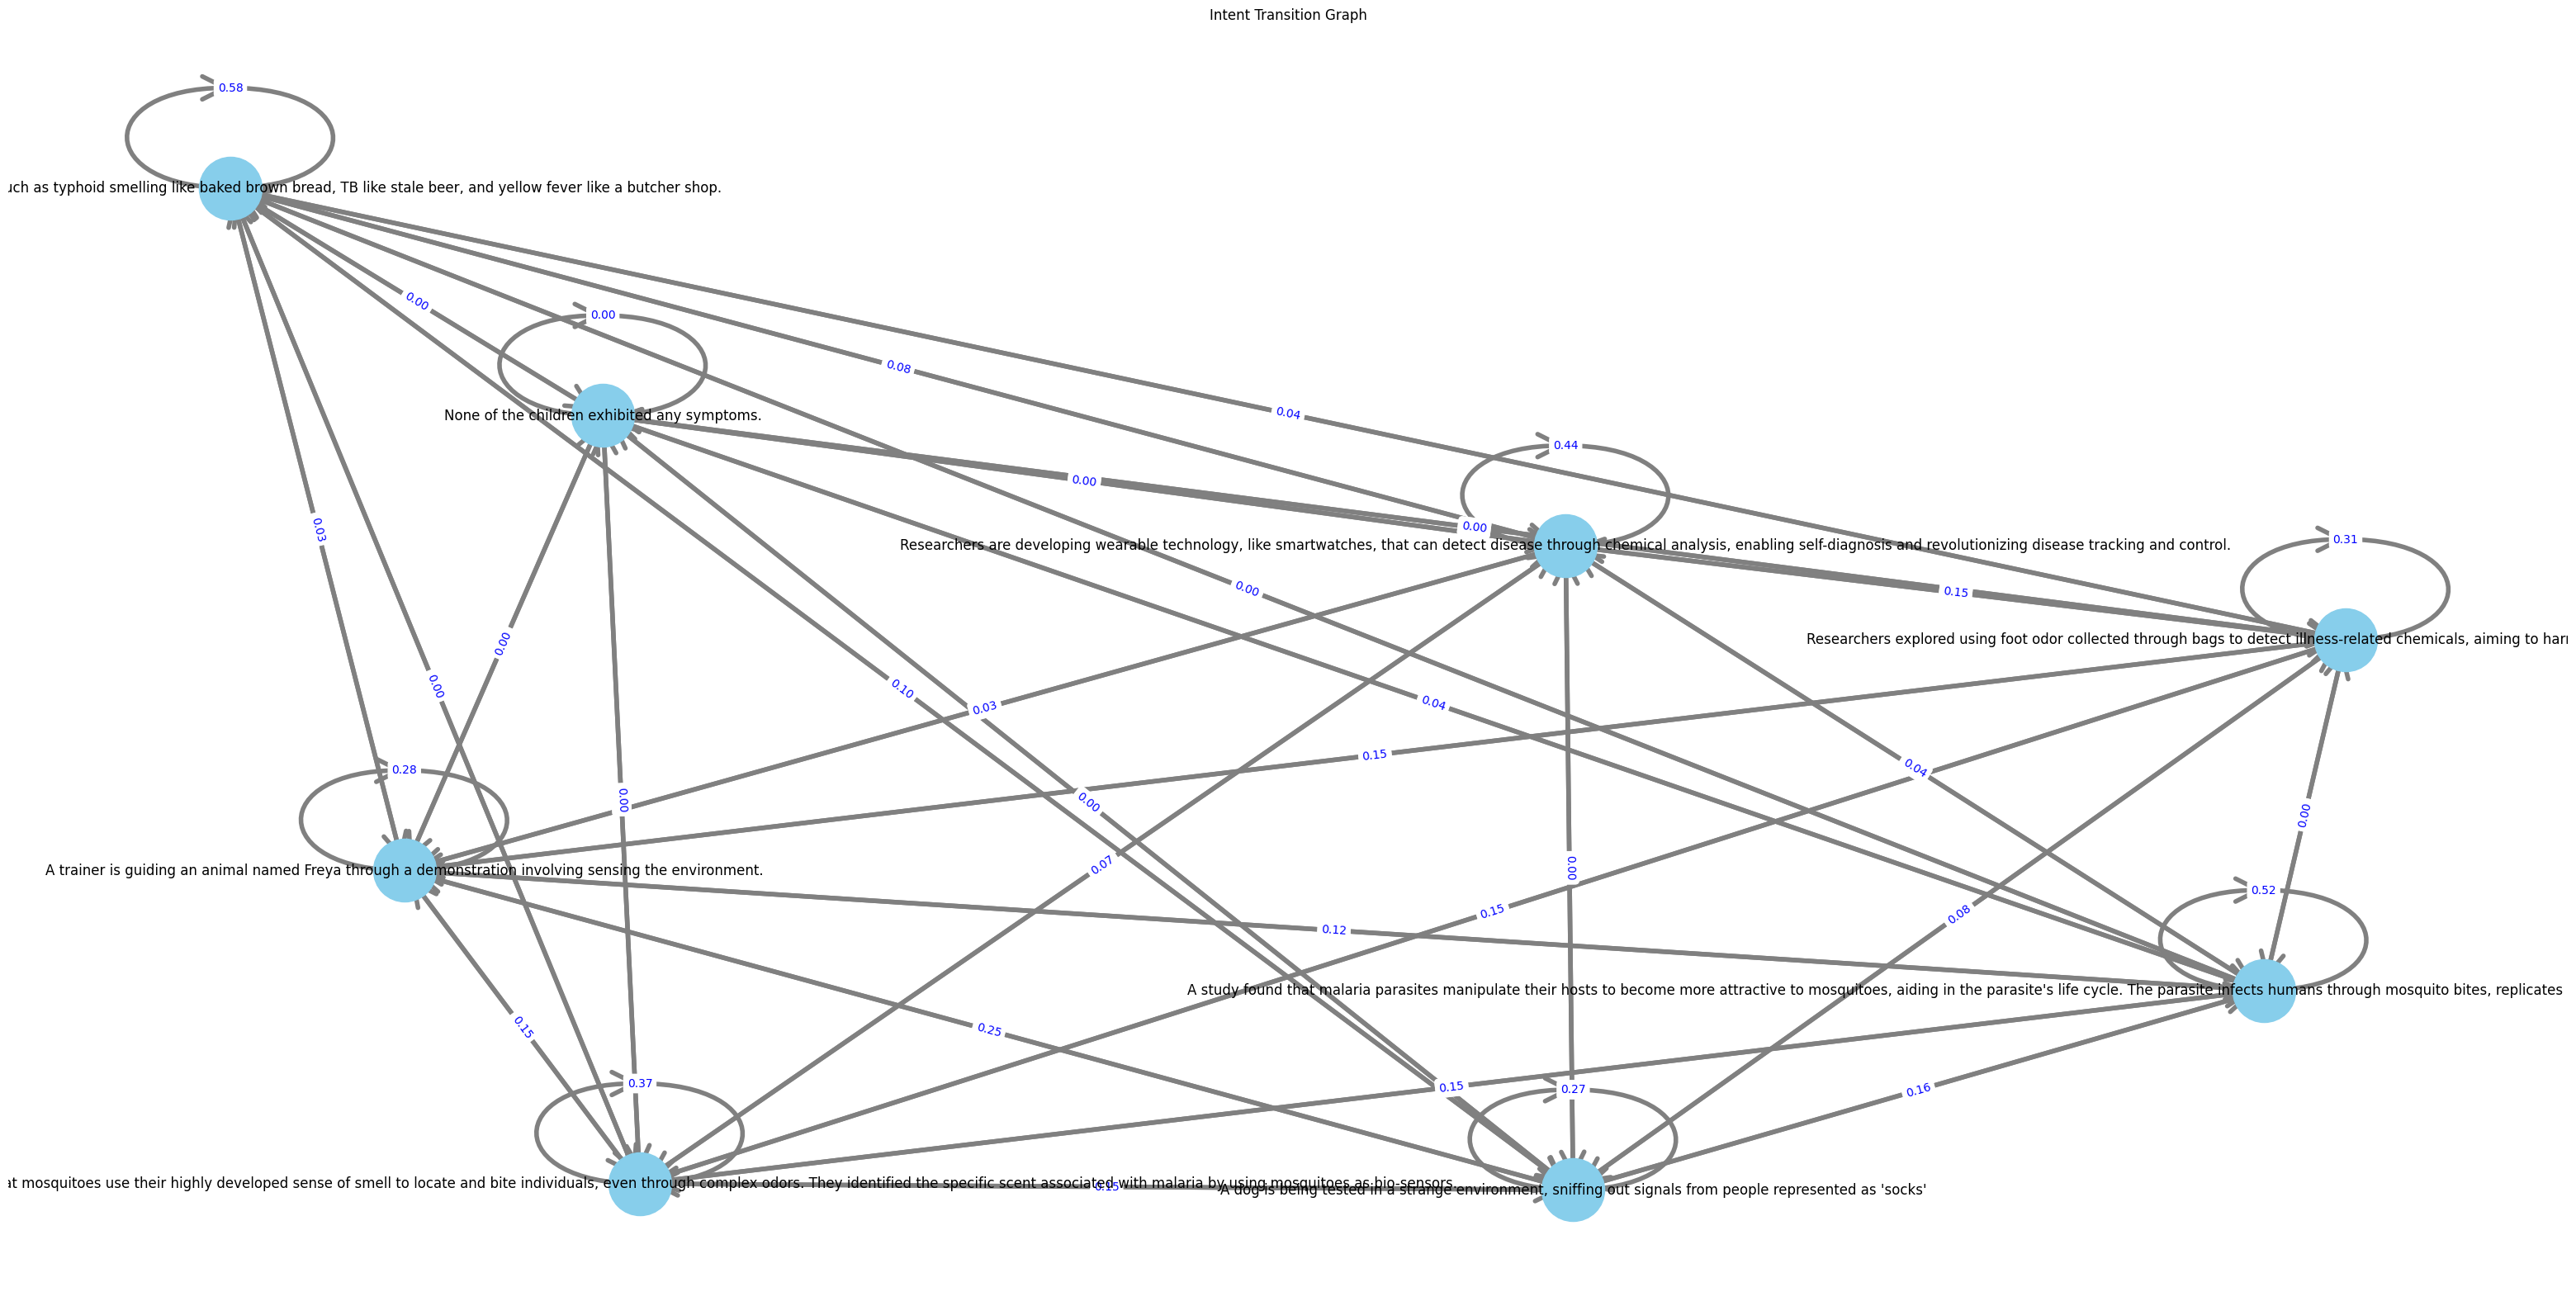

In [26]:
plot_graph(graph  , cluster_summaries)

In [27]:

def most_probable_path(graph, start, end):
    n = len(graph.nodes)
    
    node_to_index = {node: i for i, node in enumerate(graph.nodes)}
    index_to_node = {i: node for node, i in node_to_index.items()}
    
    dp = [[float('inf')] * n for _ in range(1 << n)]
    parent = [[-1] * n for _ in range(1 << n)]
    
    dp[1 << node_to_index[start]][node_to_index[start]] = 0
    
    for mask in range(1 << n):
        for u in range(n):
            if mask & (1 << u):
                for v in range(n):
                    if not mask & (1 << v) and graph.has_edge(index_to_node[u], index_to_node[v]):
                        new_mask = mask | (1 << v)
                        weight = graph[index_to_node[u]][index_to_node[v]].get('weight', 1)
                        if dp[mask][u] + weight < dp[new_mask][v]:
                            dp[new_mask][v] = dp[mask][u] + weight
                            parent[new_mask][v] = u
    
    full_mask = (1 << n) - 1
    u = node_to_index[end]
    min_cost = float('inf')
    end_node = -1

    for i in range(n):
        if dp[full_mask][i] < min_cost and graph.has_edge(index_to_node[i], end):
            min_cost = dp[full_mask][i]
            end_node = i

    if end_node == -1:
        return []

    path = [end]
    mask = full_mask
    u = end_node

    while u != -1:
        path.append(index_to_node[u])
        next_u = parent[mask][u]
        mask ^= (1 << u)
        u = next_u

    path.reverse()
    return path

In [28]:
first_node = cluster_summaries[clustered_sentences_dict[0]["cluster"]]
last_node = cluster_summaries[clustered_sentences_dict[len(clustered_sentences_dict)-1]["cluster"]]
print( first_node +" \n \n________\n\n" + last_node)
path = most_probable_path(graph , first_node , last_node)

A study found that malaria parasites manipulate their hosts to become more attractive to mosquitoes, aiding in the parasite's life cycle. The parasite infects humans through mosquito bites, replicates within the mosquito's gut and salivary glands, and is then transmitted back to humans during subsequent bites. 
 
________

A dog is being tested in a strange environment, sniffing out signals from people represented as 'socks'


In [29]:
print(path)

["A study found that malaria parasites manipulate their hosts to become more attractive to mosquitoes, aiding in the parasite's life cycle. The parasite infects humans through mosquito bites, replicates within the mosquito's gut and salivary glands, and is then transmitted back to humans during subsequent bites.", 'Researchers explored using foot odor collected through bags to detect illness-related chemicals, aiming to harness the power of smell for medical diagnosis.', 'None of the children exhibited any symptoms.', "A dog is being tested in a strange environment, sniffing out signals from people represented as 'socks'", 'Researchers are developing wearable technology, like smartwatches, that can detect disease through chemical analysis, enabling self-diagnosis and revolutionizing disease tracking and control.', 'Researchers discovered that mosquitoes use their highly developed sense of smell to locate and bite individuals, even through complex odors. They identified the specific sce